In [372]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction/diabetes.csv


In [373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix

In [374]:
data=pd.read_csv("/kaggle/input/diabetes-prediction/diabetes.csv")
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [375]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [376]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [377]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [378]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [379]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [380]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [381]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0--> non_diabetic
1-->diabetic

In [382]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [383]:
data_dup=data.duplicated().any()

In [384]:
data_dup

False

In [385]:
cate_val=[]
nume_val=[]
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        nume_val.append(column)

In [386]:
cate_val

['Outcome']

In [387]:
nume_val

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [388]:
X=data.drop(columns='Outcome',axis=1)

In [389]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [390]:
Y=data['Outcome']
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [391]:
scaler=StandardScaler()

In [392]:
scaler.fit(X)

StandardScaler()

In [393]:
standardized_data=scaler.transform(X)

In [394]:
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [395]:
X=standardized_data
Y=data['Outcome']

In [396]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [397]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [398]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the model

**SVM**

In [399]:
svm_clf= SVC()
svm_clf.fit(X_train,Y_train)

svm_pred = svm_clf.predict(X_test)
X_train_svm_prediction = svm_clf.predict(X_train)
training_data_accuracy=accuracy_score(X_train_svm_prediction,Y_train)
X_test_svm_prediction = svm_clf.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_svm_prediction,Y_test)
print(training_data_accuracy)
print(testing_data_accuracy)
print(mean_squared_error(Y_test,svm_pred))
print(accuracy_score(Y_test,svm_pred))
print(f"Accuracy Score of training data : {training_data_accuracy * 100} %")

0.8289902280130294
0.7272727272727273
0.2727272727272727
0.7272727272727273
Accuracy Score of training data : 82.89902280130293 %


In [400]:
confusion_matrix(Y_test,svm_pred)

array([[88, 12],
       [30, 24]])

**KNN**

In [401]:
K_clf=KNeighborsClassifier()
K_clf.fit(X_train,Y_train)
X_train_clf_prediction = K_clf.predict(X_train)
training_data_accuracy=accuracy_score(X_train_clf_prediction,Y_train)
K_test_clf_pred = K_clf.predict(X_test)
testing_data_accuracy=accuracy_score(K_test_clf_pred,Y_test)
print(mean_squared_error(Y_test,K_test_clf_pred))
print(accuracy_score(Y_test,K_test_clf_pred))


0.2792207792207792
0.7207792207792207


In [402]:
confusion_matrix(Y_test,K_clf_pred)

array([[87, 13],
       [30, 24]])

**NAIVE BAYES**

In [403]:
G_NB= GaussianNB()
G_NB.fit(X_train,Y_train)

G_NB_pred = G_NB.predict(X_test)
print(mean_squared_error(Y_test,G_NB_pred))
print(accuracy_score(Y_test,G_NB_pred))

0.22727272727272727
0.7727272727272727


In [404]:
confusion_matrix(Y_test,G_NB_pred)

array([[88, 12],
       [23, 31]])

**RANDOM FOREST** 

In [405]:
rc_clf= RandomForestClassifier()
rc_clf.fit(X_train,Y_train)

rc_pred = rc_clf.predict(X_test)
print(mean_squared_error(Y_test,rc_pred))
print(accuracy_score(Y_test,rc_pred))

0.24025974025974026
0.7597402597402597


In [406]:
confusion_matrix(Y_test,rc_pred)

array([[88, 12],
       [25, 29]])

**DECISIONTREE**

In [407]:
dc_clf= DecisionTreeClassifier()
dc_clf.fit(X_train,Y_train)

dlf_pred=dc_clf.predict(X_test)
print(mean_squared_error(Y_test,dlf_pred))
print(accuracy_score(Y_test,dlf_pred))

0.3181818181818182
0.6818181818181818


**LOGISTIC REGRESSION**

In [408]:
clf=LogisticRegression()
clf.fit(X_train,Y_train)

test_pred=clf.predict(X_test)
mean_squared_error(Y_test,test_pred)
accuracy_score(Y_test,test_pred)

print(mean_squared_error(Y_test,dlf_pred))
print(accuracy_score(Y_test,dlf_pred))

0.3181818181818182
0.6818181818181818


In [409]:
confusion_matrix(Y_test,test_pred)

array([[89, 11],
       [26, 28]])

In [410]:
final_data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GNB'],'ACC':[accuracy_score(Y_test,test_pred),accuracy_score(Y_test,svm_pred),accuracy_score(Y_test,K_clf_pred),accuracy_score(Y_test,dlf_pred),accuracy_score(Y_test,rc_pred),accuracy_score(Y_test,G_NB_pred)]})

In [411]:
final_data

,Models,ACC
0,LR,0.759740
1,SVM,0.727273
2,KNN,0.720779
3,DT,0.681818
4,RF,0.759740
5,GNB,0.772727


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Models', ylabel='ACC'>

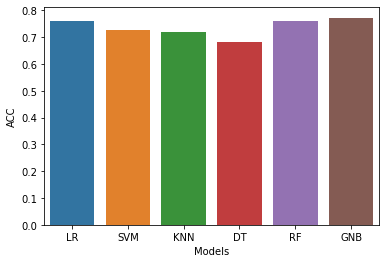

In [412]:
sns.barplot(final_data['Models'],final_data['ACC'])